<a href="https://colab.research.google.com/github/Mino94/malicious_pdf_classification/blob/main/%EC%95%85%EC%84%B1%EC%BD%94%EB%93%9C_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_%EA%B9%80%EB%AF%BC%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
from google.colab import drive

drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [107]:
%cd /content/gdrive/MyDrive/data

/content/gdrive/MyDrive/data


In [108]:
%pwd

'/content/gdrive/MyDrive/data'

In [109]:
# !unzip -P "infected" "pdf_sample.zip"

In [110]:
!ls

final_pdf_parsing_success.csv  pdf_parsing_success2.csv  pdf_sample.zip
model_data_set.csv	       pdf_parsing_success3.csv  pdf_title2.csv
pdf_benign_6667.csv	       pdf_parsing_success.csv	 pdf_title.csv
pdfid			       pdf_samples		 pdf_title_success.csv
pdf_malicious_2899.csv	       pdf_samples_info.csv	 target-directory


# 데이터 불러오기

## pdf parsing csv 파일

In [111]:
import pandas as pd

df = pd.read_csv('./final_pdf_parsing_success.csv')

df

,Unnamed: 0,sha256,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,/JS,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors > 2^24
0,0,8b7494a8141da134442238a8a19c27a10dbe5cf3e01ca4...,104,104,81,81,0,0,2,20,2,7,0,0,0,0,0,0,0,0,0,0,0
1,1,8b45878de057a5773d3da8185eb5386b48350a4764745e...,62,62,19,19,2,2,2,10,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,8b214cdae470d068a8e9116f1a39f3b9dadc1a365de21b...,104,104,93,93,0,0,3,8,0,10,0,0,0,0,0,0,0,0,0,0,0
3,3,8b75c04d69844d1d2dd4eaaf095156a81ae3d69304995e...,31,31,9,9,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,8b7f5d4b85ac2708678b07413059a839e926105736c466...,78,78,74,74,0,0,1,0,1,21,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10609,10609,2bc5e646bfd609b0073a3be8a75a8ed42140296a10626a...,52,52,8,8,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
10610,10610,3a1ccab34d9dd91f542db38ac757cc7ec183ea4295d858...,49,49,8,8,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
10611,10611,3af0755a954285ceb45a87c8068b7a694980190fb718d7...,53,53,8,8,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
10612,10612,483b653c4f85219d169dbc49ae0d811e3b55dbe800a0dc...,53,53,10,10,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
df= df.drop(['Unnamed: 0'], axis=1)

In [113]:
df.head()

,sha256,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,/JS,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors > 2^24
0,8b7494a8141da134442238a8a19c27a10dbe5cf3e01ca4...,104,104,81,81,0,0,2,20,2,7,0,0,0,0,0,0,0,0,0,0,0
1,8b45878de057a5773d3da8185eb5386b48350a4764745e...,62,62,19,19,2,2,2,10,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8b214cdae470d068a8e9116f1a39f3b9dadc1a365de21b...,104,104,93,93,0,0,3,8,0,10,0,0,0,0,0,0,0,0,0,0,0
3,8b75c04d69844d1d2dd4eaaf095156a81ae3d69304995e...,31,31,9,9,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8b7f5d4b85ac2708678b07413059a839e926105736c466...,78,78,74,74,0,0,1,0,1,21,0,0,0,1,0,0,0,0,0,0,0


In [114]:
!ls

final_pdf_parsing_success.csv  pdf_parsing_success2.csv  pdf_sample.zip
model_data_set.csv	       pdf_parsing_success3.csv  pdf_title2.csv
pdf_benign_6667.csv	       pdf_parsing_success.csv	 pdf_title.csv
pdfid			       pdf_samples		 pdf_title_success.csv
pdf_malicious_2899.csv	       pdf_samples_info.csv	 target-directory


## labeling 된 csv 파일

In [115]:
benign_df = pd.read_csv('./pdf_benign_6667.csv')

benign_df.head()

,Unnamed: 0,filetype,vt_total,sha256,size,vt_cache,vt_positives,tags
0,3430,pdf,63.0,472a39ef46ff037ed86998df89fb7b00cac49e8a3bab49...,1307522.0,1.0,0.0,"2020.11.30, benign, vt"
1,3431,pdf,62.0,47306b179b56917bbe328da41550f29ef24c18e7061708...,262373.0,1.0,0.0,"2020.12.08, benign, vt"
2,3436,pdf,59.0,486794494805a110736ee8f63d011ab275ca578f9d02c1...,265745.0,1.0,0.0,"benign, vt, 2020.11.17"
3,3445,pdf,61.0,4c34648efff32d0bb8a66ddb7e632b24b2588d4398d555...,9533230.0,1.0,0.0,"benign, 2021.01.08, vt"
4,3451,pdf,63.0,4f93591007cf9c081cc43c4baebb4e76ed7abff97134c5...,6937309.0,1.0,0.0,"2020.11.30, benign, vt"


In [116]:
malicious_df = pd.read_csv('./pdf_malicious_2899.csv')

malicious_df.head()

,Unnamed: 0,tags,filetype,vt_total,sha256,size,vt_cache,vt_positives
0,9,"check_result, malicious",pdf,58.0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,41560.0,1.0,32.0
1,15,"check_result, malicious",pdf,58.0,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,46056.0,1.0,30.0
2,19,"check_result, malicious",pdf,55.0,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,13769.0,1.0,21.0
3,20,"check_result, malicious",pdf,58.0,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,52273.0,1.0,27.0
4,72,"check_result,malicious",pdf,60.0,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,375809.0,1.0,31.0


# 데이터 전처리

benign : 0

malicious : 1

filetype 삭제

In [117]:
benign_df['tags'] = 0

benign_df.head()

,Unnamed: 0,filetype,vt_total,sha256,size,vt_cache,vt_positives,tags
0,3430,pdf,63.0,472a39ef46ff037ed86998df89fb7b00cac49e8a3bab49...,1307522.0,1.0,0.0,0
1,3431,pdf,62.0,47306b179b56917bbe328da41550f29ef24c18e7061708...,262373.0,1.0,0.0,0
2,3436,pdf,59.0,486794494805a110736ee8f63d011ab275ca578f9d02c1...,265745.0,1.0,0.0,0
3,3445,pdf,61.0,4c34648efff32d0bb8a66ddb7e632b24b2588d4398d555...,9533230.0,1.0,0.0,0
4,3451,pdf,63.0,4f93591007cf9c081cc43c4baebb4e76ed7abff97134c5...,6937309.0,1.0,0.0,0


In [118]:
benign_df=benign_df.drop(['Unnamed: 0', 'filetype'], axis=1)
benign_df.head()

,vt_total,sha256,size,vt_cache,vt_positives,tags
0,63.0,472a39ef46ff037ed86998df89fb7b00cac49e8a3bab49...,1307522.0,1.0,0.0,0
1,62.0,47306b179b56917bbe328da41550f29ef24c18e7061708...,262373.0,1.0,0.0,0
2,59.0,486794494805a110736ee8f63d011ab275ca578f9d02c1...,265745.0,1.0,0.0,0
3,61.0,4c34648efff32d0bb8a66ddb7e632b24b2588d4398d555...,9533230.0,1.0,0.0,0
4,63.0,4f93591007cf9c081cc43c4baebb4e76ed7abff97134c5...,6937309.0,1.0,0.0,0


In [119]:
malicious_df.vt_cache.value_counts()

0.0    2056
1.0     843
Name: vt_cache, dtype: int64

In [120]:
malicious_df=malicious_df.drop(['Unnamed: 0', 'filetype'], axis=1)
malicious_df.head()

,tags,vt_total,sha256,size,vt_cache,vt_positives
0,"check_result, malicious",58.0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,41560.0,1.0,32.0
1,"check_result, malicious",58.0,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,46056.0,1.0,30.0
2,"check_result, malicious",55.0,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,13769.0,1.0,21.0
3,"check_result, malicious",58.0,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,52273.0,1.0,27.0
4,"check_result,malicious",60.0,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,375809.0,1.0,31.0


In [121]:
malicious_df['tags'] = 1

malicious_df.head()

,tags,vt_total,sha256,size,vt_cache,vt_positives
0,1,58.0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,41560.0,1.0,32.0
1,1,58.0,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,46056.0,1.0,30.0
2,1,55.0,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,13769.0,1.0,21.0
3,1,58.0,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,52273.0,1.0,27.0
4,1,60.0,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,375809.0,1.0,31.0


In [122]:
labeling_df = pd.concat([benign_df, malicious_df])

labeling_df

,vt_total,sha256,size,vt_cache,vt_positives,tags
0,63.0,472a39ef46ff037ed86998df89fb7b00cac49e8a3bab49...,1307522.0,1.0,0.0,0
1,62.0,47306b179b56917bbe328da41550f29ef24c18e7061708...,262373.0,1.0,0.0,0
2,59.0,486794494805a110736ee8f63d011ab275ca578f9d02c1...,265745.0,1.0,0.0,0
3,61.0,4c34648efff32d0bb8a66ddb7e632b24b2588d4398d555...,9533230.0,1.0,0.0,0
4,63.0,4f93591007cf9c081cc43c4baebb4e76ed7abff97134c5...,6937309.0,1.0,0.0,0
...,...,...,...,...,...,...
2894,0.0,f58e7ade32ed019ec03e426417f57e55bef339e597f7e4...,82237.0,0.0,0.0,1
2895,0.0,4ab0b160b8508b6d28ab7f1a618f8fbd079c9eb19d1b4f...,72618.0,0.0,0.0,1
2896,0.0,84f48e77786cb48de7c74c2d4042315d424fe6c03a89db...,86040.0,0.0,0.0,1
2897,0.0,d1472278890b25a8d26baa03a06f2e5965aec65d0c673e...,70602.0,0.0,0.0,1


In [123]:
df.shape, labeling_df.shape

((10614, 22), (9566, 6))

# EDA

In [124]:
model_df = pd.merge(df, labeling_df, left_on='sha256', right_on='sha256', how='inner')
model_df.head()

,sha256,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,/JS,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors > 2^24,vt_total,size,vt_cache,vt_positives,tags
0,8b7494a8141da134442238a8a19c27a10dbe5cf3e01ca4...,104,104,81,81,0,0,2,20,2,7,0,0,0,0,0,0,0,0,0,0,0,0.0,635958.0,1.0,0.0,0
1,8b45878de057a5773d3da8185eb5386b48350a4764745e...,62,62,19,19,2,2,2,10,0,1,0,0,0,0,0,0,0,0,0,0,0,56.0,239914.0,1.0,0.0,0
2,8b214cdae470d068a8e9116f1a39f3b9dadc1a365de21b...,104,104,93,93,0,0,3,8,0,10,0,0,0,0,0,0,0,0,0,0,0,0.0,989007.0,1.0,0.0,0
3,8b75c04d69844d1d2dd4eaaf095156a81ae3d69304995e...,31,31,9,9,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,59160.0,1.0,0.0,0
4,8b7f5d4b85ac2708678b07413059a839e926105736c466...,78,78,74,74,0,0,1,0,1,21,0,0,0,1,0,0,0,0,0,0,0,0.0,645743.0,1.0,0.0,0


In [125]:
model_df = model_df.drop(['vt_total', 'vt_cache', 'vt_positives'], axis=1)

In [126]:
model_df.to_csv('model_data_set.csv')

In [127]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9441 entries, 0 to 9440
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sha256          9441 non-null   object 
 1   obj             9441 non-null   int64  
 2   endobj          9441 non-null   int64  
 3   stream          9441 non-null   int64  
 4   endstream       9441 non-null   int64  
 5   xref            9441 non-null   int64  
 6   trailer         9441 non-null   int64  
 7   startxref       9441 non-null   int64  
 8   /Page           9441 non-null   int64  
 9   /Encrypt        9441 non-null   int64  
 10  /ObjStm         9441 non-null   int64  
 11  /JS             9441 non-null   int64  
 12  /JavaScript     9441 non-null   int64  
 13  /AA             9441 non-null   int64  
 14  /OpenAction     9441 non-null   int64  
 15  /AcroForm       9441 non-null   int64  
 16  /JBIG2Decode    9441 non-null   int64  
 17  /RichMedia      9441 non-null   i

In [128]:
model_df.describe()

,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,/JS,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors > 2^24,size,tags
count,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9.441000e+03,9441.000000
mean,497.388200,497.145218,207.773859,207.246796,1.291283,1.292024,1.618155,26.072556,0.040462,6.404512,0.174028,0.131236,0.093952,0.256647,0.104650,0.502171,0.000106,0.046393,0.043957,0.005614,0.000106,1.408601e+06,0.300498
std,2660.227068,2659.986186,1578.409607,1578.144359,1.161757,1.147948,1.120043,136.660612,0.257626,40.780043,3.599156,3.596703,1.406841,0.504130,0.440604,16.727851,0.010292,2.932425,0.540593,0.076123,0.010292,4.645756e+06,0.458499
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.830000e+02,0.000000
25%,40.000000,39.000000,7.000000,7.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.611500e+04,0.000000
50%,69.000000,69.000000,23.000000,23.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.214560e+05,0.000000
75%,203.000000,203.000000,91.000000,91.000000,2.000000,2.000000,2.000000,14.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.746910e+05,1.000000
max,102532.000000,102530.000000,85934.000000,85934.000000,35.000000,35.000000,48.000000,7725.000000,6.000000,1557.000000,267.000000,268.000000,88.000000,22.000000,22.000000,1067.000000,1.000000,283.000000,24.000000,2.000000,1.000000,1.721597e+08,1.000000


## Base line

In [129]:
model_df.tags.value_counts(normalize=True)

0    0.699502
1    0.300498
Name: tags, dtype: float64

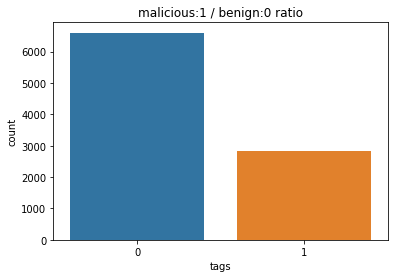

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

sns.countplot(x="tags", data=model_df)
plt.title("malicious:1 / benign:0 ratio")
plt.show()

# train validation 데이터 분류

In [131]:
from sklearn.model_selection import train_test_split

X = model_df.drop(['tags','sha256'], axis=1)
y = model_df['tags']

X.shape, y.shape

((9441, 22), (9441,))

In [132]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7552, 22), (1889, 22), (7552,), (1889,))

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6041, 22), (1511, 22), (6041,), (1511,))

In [134]:
y_train.value_counts(normalize=True)

0    0.699553
1    0.300447
Name: tags, dtype: float64

In [135]:
y_val.value_counts(normalize=True)

0    0.699312
1    0.300688
Name: tags, dtype: float64

In [136]:
y_test.value_counts(normalize=True)

0    0.699537
1    0.300463
Name: tags, dtype: float64

# modeling

## RandomForest 

In [137]:
!pip install category_encoders

In [138]:
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.8909475913181577


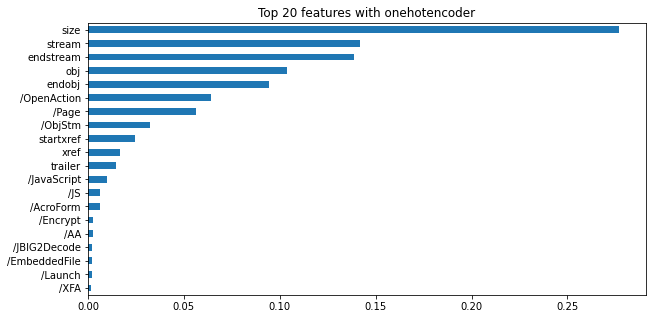

In [139]:
import matplotlib.pyplot as plt

# 특성 중요도(onehot)
rf = pipe.named_steps['randomforestclassifier']
colnames = pipe.named_steps['onehotencoder'].get_feature_names()
importances = pd.Series(rf.feature_importances_, colnames)

n = 20
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with onehotencoder')
importances.sort_values()[-n:].plot.barh();

**분류문제에서 적합한 평가지표**

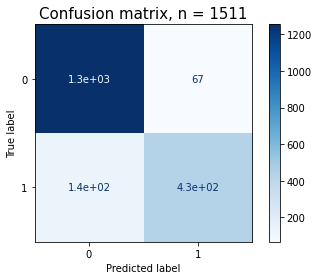

In [140]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15);

In [141]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1321
           1       0.86      0.76      0.81       568

    accuracy                           0.89      1889
   macro avg       0.88      0.85      0.87      1889
weighted avg       0.89      0.89      0.89      1889



In [142]:
from sklearn.metrics import roc_auc_score

y_pred_proba = pipe.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.9045617383331024


Text(0, 0.5, 'TPR')

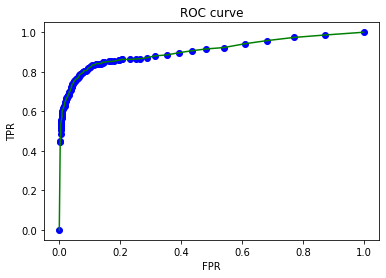

In [143]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

### RandomForest 결과

In [173]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score

y_pred_proba = pipe.predict_proba(X_test)[:, -1]
print('AUC score: ', roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2168
         1.0       0.95      0.91      0.93       948

    accuracy                           0.96      3116
   macro avg       0.96      0.94      0.95      3116
weighted avg       0.96      0.96      0.96      3116

AUC score:  0.9710256200663272


Text(0, 0.5, 'TPR')

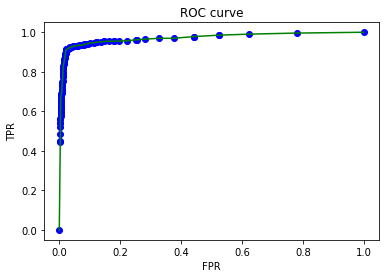

In [174]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [157]:
pipe.classes_

array([0, 1])

In [158]:
pipe.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0])

In [160]:
pipe.predict_proba(X_test)

array([[0.  , 1.  ],
       [0.33, 0.67],
       [0.74, 0.26],
       ...,
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.98, 0.02]])

In [163]:
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
y_pred_proba

array([1.  , 0.67, 0.26, ..., 0.01, 1.  , 0.02])

In [167]:
t = pipe.predict(X_test)

In [172]:
pd.DataFrame({"prob" : y_pred_proba, "predict" : t, "y_test" : y_test})

,prob,predict,y_test
0,1.000000,1,1.0
1,0.670000,1,1.0
2,0.260000,0,0.0
3,0.000000,0,0.0
4,0.080000,0,1.0
...,...,...,...
3111,0.581429,1,1.0
3112,0.640000,1,1.0
3113,0.010000,0,0.0
3114,1.000000,1,1.0


## SVM

In [144]:
from sklearn import svm

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [10],
            'kernel': ['rbf']
        }  
    }
}

In [145]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, f1_score, auc
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    clf.score(X_val, y_val)

    y_predicted = clf.predict(X_val)
    conf_matx = confusion_matrix(y_val, y_predicted)

    # define pos label in order to calculate precision, recall, F1-Score, ROC 
    # for a ##specific Class
    positive_lbl = 1
    fpr, tpr, _ = roc_curve(y_val, y_predicted, pos_label = positive_lbl)
    roc_auc = auc(fpr, tpr)

    precision = precision_score(y_true=y_val, y_pred=y_predicted, average='macro', pos_label = positive_lbl)
    recall = recall_score(y_true=y_val, y_pred=y_predicted, average='macro', pos_label = positive_lbl)
    f1_scor = f1_score(y_true=y_val, y_pred=y_predicted, average='macro', pos_label = positive_lbl)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'c_matrix': conf_matx ,
        'roc_auc' : roc_auc,
        'precision' : precision,
        'recall' : recall,
        'f1_score' : f1_scor,
        'tpr' : tpr,
        'fpr' : fpr
    })
    

df = pd.DataFrame(scores,columns=['model','best_score','best_params', 'c_matrix', 'roc_auc', 
                                  'precision', 'recall', 'f1_score', 'tpr', 'fpr'])

df[['model','best_score','best_params']]


,model,best_score,best_params
0,svm,0.765434,"{'C': 10, 'kernel': 'rbf'}"


In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

c_matx = df['c_matrix']
roc_auc = df['roc_auc']
tpr =  df['tpr']
fpr = df['fpr']

def plot_roc(roc_index, title):
  plt.figure()
  lw = 2
  plt.plot(fpr[roc_index], tpr[roc_index], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[roc_index])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC : '+title)
  plt.legend(loc="lower right")
  plt.show()


def plot_cmatricx(c_matx_index, title):
  plt.figure(figsize = (5,4))
  sn.heatmap(c_matx[c_matx_index], annot=True)
  plt.title('Confusion Matricx : '+ title)
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

def otherValues(index):
  print('Accuracy :', df['best_score'][index])
  print('Precision :', df['precision'][index])
  print('Recall :', df['recall'][index])
  print('F1-Score :', df['f1_score'][index])

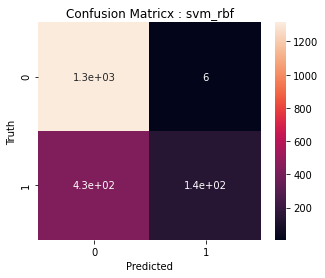

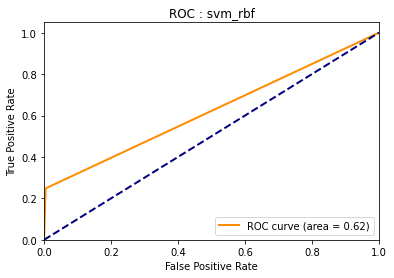

Accuracy : 0.7654341883993667
Precision : 0.8570315611893438
Recall : 0.6218487114968387
F1-Score : 0.6265204596252588


In [147]:
title = 'svm_rbf'
index = 0
plot_cmatricx(index, title)
plot_roc(index, title)
otherValues(index)

## Neural Network

In [148]:
# ensure all data are floating point values
X = X.astype('float32')
y = y.astype('float32')
# encode strings to integer
# y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

(6325, 22) (3116, 22) (6325,) (3116,)


In [149]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6325, 22) (3116, 22) (6325,) (3116,)


In [150]:
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test1 = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train1 = np.array(y_train)
y_test1 = np.array(y_test)

print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(6325, 22, 1) (3116, 22, 1) (6325,) (3116,)


## Multi-layer Perceptron (MLP)

In [151]:
!pip install tensorflow-addons


In [152]:
import tensorflow as tf
import tensorflow_addons as tfa

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [153]:
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics= ['accuracy',tf.keras.metrics.Precision(name='precision'), 
                        tf.keras.metrics.Recall(name = 'recall'),
                        tfa.metrics.F1Score(num_classes= 1, name = 'f1_score') 
                    ])
# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# # evaluate the model
# loss, acc = model.evaluate(X_test, y_test, verbose=0)
# print('Test Accuracy: %.3f' % acc)

num_epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=num_epochs, 
          validation_data=(X_test, y_test))

Epoch 1/10
198/198 [==============================] - 2s 8ms/step - loss: 159.5284 - accuracy: 0.7462 - precision: 0.5830 - recall: 0.5278 - f1_score: 0.5994 - val_loss: 1424.6254 - val_accuracy: 0.3042 - val_precision: 0.3042 - val_recall: 1.0000 - val_f1_score: 0.4665
Epoch 2/10
198/198 [==============================] - 1s 6ms/step - loss: 177.8368 - accuracy: 0.7374 - precision: 0.5804 - recall: 0.4357 - f1_score: 0.5587 - val_loss: 39.3523 - val_accuracy: 0.8017 - val_precision: 0.6387 - val_recall: 0.8017 - val_f1_score: 0.6791
Epoch 3/10
198/198 [==============================] - 1s 6ms/step - loss: 150.9512 - accuracy: 0.7317 - precision: 0.5520 - recall: 0.5394 - f1_score: 0.5984 - val_loss: 42.8872 - val_accuracy: 0.8068 - val_precision: 0.6494 - val_recall: 0.7932 - val_f1_score: 0.6905
Epoch 4/10
198/198 [==============================] - 1s 6ms/step - loss: 327.3970 - accuracy: 0.7238 - precision: 0.5472 - recall: 0.4357 - f1_score: 0.5335 - val_loss: 734.2213 - val_accura

## LSTM

In [154]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics= ['accuracy',tf.keras.metrics.Precision(name='precision'), 
                        tf.keras.metrics.Recall(name = 'recall'),
                        tfa.metrics.F1Score(num_classes= 1, name = 'f1_score') 
                    ])


num_epochs = 10
history = model.fit(X_train1, y_train1, batch_size=32, epochs=num_epochs, 
          validation_data=(X_val1, y_val1))

Epoch 1/10
198/198 [==============================] - 11s 46ms/step - loss: 30722.7188 - accuracy: 0.6683 - precision: 0.3244 - recall: 0.1022 - f1_score: 0.1634 - val_loss: 3141.9648 - val_accuracy: 0.7035 - val_precision: 1.0000 - val_recall: 0.0141 - val_f1_score: 0.0312
Epoch 2/10
198/198 [==============================] - 9s 43ms/step - loss: 14564.7871 - accuracy: 0.6697 - precision: 0.3221 - recall: 0.0958 - f1_score: 0.1707 - val_loss: 4635.3784 - val_accuracy: 0.6993 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/10
198/198 [==============================] - 8s 43ms/step - loss: 7939.7061 - accuracy: 0.6830 - precision: 0.3415 - recall: 0.0662 - f1_score: 0.1231 - val_loss: 428.4186 - val_accuracy: 0.6517 - val_precision: 0.4554 - val_recall: 0.8081 - val_f1_score: 0.5768
Epoch 4/10
198/198 [==============================] - 8s 43ms/step - loss: 11213.7637 - accuracy: 0.6809 - precision: 0.3842 - recall: 0.1133 - f1_score: 0.1953 - val_

## CNN

In [176]:
model = tf.keras.Sequential([
     tf.keras.layers.LSTM(135, return_sequences=True, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,1)),
    tf.keras.layers.LSTM(270, return_sequences=True),
    tf.keras.layers.Conv1D(16, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics= ['accuracy',tf.keras.metrics.Precision(name='precision'), 
                        tf.keras.metrics.Recall(name = 'recall'),
                        tfa.metrics.F1Score(num_classes= 1, name = 'f1_score') 
                    ])


num_epochs = 10
history = model.fit(X_train1, y_train1, batch_size=32, epochs=num_epochs, 
          validation_data=(X_val1, y_val1))

Epoch 1/10
198/198 [==============================] - 15s 54ms/step - loss: 0.4398 - accuracy: 0.8068 - precision: 0.7139 - recall: 0.5892 - f1_score: 0.4599 - val_loss: 0.4167 - val_accuracy: 0.8190 - val_precision: 0.8576 - val_recall: 0.4771 - val_f1_score: 0.4624
Epoch 2/10
198/198 [==============================] - 9s 47ms/step - loss: 0.4025 - accuracy: 0.8248 - precision: 0.7956 - recall: 0.5564 - f1_score: 0.4599 - val_loss: 0.4483 - val_accuracy: 0.7941 - val_precision: 0.6371 - val_recall: 0.7324 - val_f1_score: 0.4624
Epoch 3/10
198/198 [==============================] - 9s 48ms/step - loss: 0.3920 - accuracy: 0.8292 - precision: 0.8039 - recall: 0.5664 - f1_score: 0.4599 - val_loss: 0.3689 - val_accuracy: 0.8306 - val_precision: 0.9397 - val_recall: 0.4665 - val_f1_score: 0.4624
Epoch 4/10
198/198 [==============================] - 9s 47ms/step - loss: 0.3680 - accuracy: 0.8337 - precision: 0.8202 - recall: 0.5675 - f1_score: 0.4599 - val_loss: 0.3775 - val_accuracy: 0.8285

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)